<a href="https://colab.research.google.com/github/todd-wilson/tech-notes/blob/main/test/Administrator_Associate_Renewal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites
* Google Colab
  * What is Google Colab?
* Markup Language
  What is Markup Language?
* Install Python
  * What is Python?
* Install GIT
  * What is GIT?
    * Benefits?
      * More frequent code deployment by automating building, testing and deploying when code is changed and committed.
      * More frequent code deployment means you can respond to bug changes and app enhancements more quickly and effectively.
* Azure Portal
* Azure Cloud Shell
  * How to access?
    * Top left on the Azure Portal.
  <br>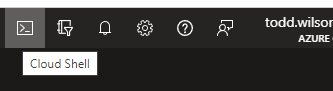


# Why Azure Portal?
* Graphical which makes things easier to learn.
* Helps you discover available features.

# Azure App Service App
Can be create with:
* Azure Portal
* Azure CLI
* A script like Powershell or Python
* An IDE (Integrated Development Environment) like Visual Studio

# Azure App Service
* Web-hosting platform for applications.
* It is platform as a service (PaaS) so the focus is on building the app and not maintaining the infrastructure and worrying about scalling up and down as your needs change. Azure takes care of all of this.

## Deployment Slots
* Live applications
* Each has their own hostname.
* Typical use case might be to have a staging slot to do your testing on and when you like what you seeing swapping this with the app running in the production slot.



## Continuous Integration Continuous Deployment (CICD)
* CICD realized in App Service Deployment Center via DevOps, GitHub, Bitbucket, FTP or a local GIT repository.
* App Service will automatically sync your code after you connect.
* Azure DevOps allows you to define a build and release process every time you commit code.
* Integration also exists between Visual Studio via its Web Deploy Technology.
* Use FTP to support older workflows.

## Autoscaling is Built In
* Allows you to scale your app to support changing workloads.
* You can increase or decrease the resource for the underlying machine which is hosting your web app.
* Scale up increases CPU cores and RAM for processing (latency).
* Scale out by adding new instances (throughput).

## Create a Web App
* When you create an app Azure allocates hosting resources in App Service.
* Apps can be
  * ASP.NET Core
  * Node.js
  * Java
  * Python
  * and more!

### Required Fields
* Subscription
  * You Azure subscription
* Resource Group
  * Logical container for resources
* App name
  * A unique name for your app. This name will be part of the apps URL.
* Publish
  * Deploy to app service as code or Docker image.
    * Retrieve your docker image from the Docker registry on the Docker tab.
* Runtime stack
  * Your programming language your app runs on. If you have a Docker image that image will have your runtime and you don't need to choose a stack.
* OS
  * Depending on your runtime stack, you will have a choice of either or both of the following:
    * Windows
      * Monitoring tab gets enabled and you can use Application Insights.
    * Linux
      * Application Insights is also available on Linux, but it requires some setup.
  * If you are using Docker, choose the OS on which you image will run.
* Region
  * The Azure region where you app's server will run.
* App Service Plan
  * A set of virtual server resources that run App Service apps.
  * The sku or pricing tier determines the resources allocated.
  * One to many relationship. The same app service plan can host multiple apps.
    * The number of web apps you deploy has no effect on you bill.
  * If you use the Azure Portal to create a web app the app service plan can also be created at the same time.

## App Service Plan
An App Service Plan are the virtual resources that run your App Service Apps.
<br/>Each plan has their own prices depending on the resources you need to allocate. This is called the plan's size, sku or pricing tier.
<br/>**The relationship for App Server Apps to App Service Plans is one to one and it is not optional. Each App Server App must have one App Service Plan assigned to it.**


### How is it charged?
* You pay for the resources you use. As the App Service Plan size increases so does the cost.
* You can use one App Service Plan to run multiple Web apps.
* A Web App **must** be assigned to one App Service Plan.

When you create a Web App from The Azure Portal you can assign it to an existing App Service Plan or create a new one.

# Web Application Setup (Local)

1. Install a web application framework.

  Here we will use flask.
  ```
  pip install flask
  ```

1. Create a small web app. This is a server which responds with a message.

  ```
  from flask import Flask
  app = Flask(__name__)
  message = "Web Apps are Cool!\n"

  @app.route("/")
  def hello():
      return message
  ```
1. Add to GIT source control. Need to

  ```
  git init
  git add .
  git commit -m "This is the first commit."
  ```

This will create a GIT source control repository locally. You can use GitHub, DevOps or another remote source control repo to set up CI/CD. You don't need a remote source control repo for this small app, but for production it is *highly* recommended as a best practice.



# Web Application Setup (Azure Cloud Shell)

blinker==1.7.0
<br>click==8.1.7
<br>Flask==3.0.0
<br>importlib-metadata==6.8.0
<br>itsdangerous==2.1.2
<br>Jinja2==3.1.2
<br>MarkupSafe==2.1.3
<br>Werkzeug==3.0.1
<br>zipp==3.17.0

1. Open Azure Cloud Shell. Make sure you have **PowerShell** selected for you editor on the top left.

1. Set up your environment.

  ```
  python3 -m venv venv
  source venv/bin/activate
  pip install flask
  ```
1. Create and new directory and switch to that directory.

  ```
  mkdir ~/HelloApp
  cd ~/HelloApp
  ```

1. Create a file for you app.
  
  ```
  code my_hello_app.py
  ```

1. Create your app.

  ```
  from flask import Flask
  app = Flask(__name__)

  @app.route("/")
  def hello():
    return "<html><body><h1>Hello World!</h1></body></html>\n"
  ```

1. Save your file.
  * Menu
    * Right-click inside the editor and select Save. Right-click again and select Quit.
  * Quick Keys
    * CTRL+S then CTRL+Q (Save and Quit)

1. Deploy

  ```
  pip freeze > my_requirements.txt
  ```


## Test your Web App

1. Open a new browser tab and go to:
  https://shell.azure.com

1. From your original shell (not this new one) run the following:

  ```
  cd ..
  source venv/bin/activate
  ```

1. Stay in the original shell and run the following:

  ```
  cd ~/HelloApp
  export FLASK_APP=my_hello_app.py
  flask run
  ```

1. Switch and go to yous secondary shell and run the following to connect to your application:

  ```
  curl https://127.0.0.1:5000/
  ```

1. You should see the following output:

<html><body><h1>Hello World!</h1></body></html>

## Deploy application on App Service

### Automated Deployment
  * Deployment Options
    * Azure DevOps
      * Build, Test and Release from the Cloud.
    * GitHub
      * Connect your Github repo to Azure. Changes which are committed to your GitHub prod branch are auto-deployed.
    * Bitbucket
      * Similar to Github in that changes committed to Bitbucket are automatically deployed for you.
    * OneDrive
      * Microsoft's storage in the cloud. OneDrive must be setup with your Microsoft account.
    * Dropbox
      * Similar to OneDrive and supported by Azure.

### Manual Deployment
* Git
  * App Service apps have a GIT Url you can use to deploy your app.
* az webapp up
  * webapp up is used with the Azure CLI to package your app and deploy it.
  * Use az webapp up to create a new web app if you don't have one already.
* ZIP deploy
  * az webapp deployment source config.zip.
    * Sends a zip of your files to App Service
    * Also available using HTTP utilities like curl.
* WAR deploy
  * Deploys Java web applications.
  * Access WAR deploy using the KUDU API here:
  https://<your-app-name>.scm.azurewebsites.net/api/wardeploy
* Visual Studio
  * Visual Studio has an app deployment wizard to help with deploying your app on App Service.
* FTP/S
  * FTP and FTPS (secure FTP) is the older way to push your code to App Service.

## Deploy to App Service

### az webapp up

Use this command to deploy your python package on yoru Azure App Service.

1. Set variables.
  * App Name
  * App Resource Group
  * App Plan
  * App Sku
  * App Location

  ```
  export APPNAME=$(az webapp list --query [0].name --output tsv)
export APPRG=$(az webapp list --query [0].resourceGroup --output tsv)
  export APPPLAN=$(az appservice plan list --query [0].name --output tsv)
export APPSKU=$(az appservice plan list --query [0].sku.name --output tsv)
  export APPLOCATION=$(az appservice plan list --query [0].location --output tsv)
  ```

1. Run az webapp up

  ```
  cd ~/HelloApp
  az webapp up --name $APPNAME --resource-group $APPRG --plan $APPPLAN --sku $APPSKU --location "$APPLOCATION"
  ```

1. Test

Look for the URL (should be right before the JSON code). Use this to open your app in a new browser tab.

You should see this in your browser:

<html><body><h1>Hello World!</h1></body></html>

## Clean up application on App Service

1.

# Build a Containerized web application using Docker

## Prerequisites
* Web App Dev familiarity
* A Docker Subscription
* Docker on your Desktop
* GIT on your Desktop

## Benefits of Containerization
* No hardware configuration, OS intallation or special software for your deployment.
  * This saves time and money!
* Multiple applications can run in their containers on the same hardware.
* Scaling out is as simple as starting more instances of your container.
* Container images can be extended over time to include more functionality.
* Containerized App are are usually much smaller than an virtual machine because the VM needs to supply the entire OS and supporting runtimes.
  * A Docker container uses the host computer to supply resources to the container. As a result container images are fast and space-saving as opposed to a virtual machine.

## Docker Overview
1. Build an image with the files and any configuration informatio your application might need.
1. Start a container in Docker based on the image you created.

Docker will provide OS resources and is responsible for security. It will make sure your containers are running at the same time, and remain mostly isolated from each other by preventing one container from accessing another. A virtual machine can isolate at the hardware level. Docker containers can't do this because they share underlying OS resources.

## Azure Container Registry and Instance
* Docker images can be uploaded to the Azure Container Registry and then run in an Azure Container Instance.

## Linux and Windows Docker Images
* Images are either Windows or Linux-based.
* To offer functionality on both Windows and Linux you will need to maintain separate images.
* You can use an environment such as ASP.NET Core which will provide the same functionality on both Windows and Linux.
* If you have a Linux host then you can only run Linux containers. If you have a Windows host you can run both Windows and Linux.

## Docker Hub and Registries
* Docker images are stored in registries which is a web service which serves container images.
* A registry is a web service which consists of one or more repositories.
  * A repository will have multiple images of containers which are grouped by name and functionality.
    * The repository is the unit of privacy for the image. You can have private repositories if you don't want to share images.
  * Images will have different versions which a tag is used to identify. This allows a developer to maintain multiple versions of their image.
  * To download an image you need to specify the following:
    * registry
    * repository
    * version tag
      * Version tags are simple text and you can use your own versioning system (v1, v2 or 1.1, 1.2 etc.)

      ```
      mcr.microsoft.com/dotnet/core/aspnet:2.1
      mcr.microsoft.com/dotnet/core/aspnet:2.2
      ```
      * Registry is mcr.microsoft.com
      * Repository is dotnet/core/aspnet
      * The version tag is 2.1 or 2.2

      ```
      mcr.microsoft.com/dotnet/samples:dotnetapp
      mcr.microsoft.com/dotnet/samples:aspnetapp
      ```
      * Registry is mcr.microsoft.com
      * Repository is dotnet/samples
      * The version tag is dotnetapp or aspnetapp.

      * **A single image can have multiple tags assigned to it.**

* Docker Hub is a public registry.
* Since Docker runs on a desktop, server or in the cloud, container images can be downloaded from Docker Hub (a public registry) and run on Docker. You can also upload and host your images there at no cost.

## Get an Image from Docker Hub
* Useful commands
  * docker pull

      ```
      docker pull <repository-path>:<tags>
      ```

      Fetches an image from the registry. If you leave off the tag the Docker will pull the image with the "latest" tag.

  * docker image list

      ```
      docker image list
      ```
      Lists images in the local registry.

  * docker run

      ```
      docker run mcr.microsoft.com/dotnet/samples:aspnetapp
      ```



### Networking on a Container

The default is to not allow inbound requests to reach your container. You may be running a web app on port 80, but unless you specify a port when running a container that port will not be visible to the outside world.

```
docker run -p 8080:80 mcr.microsoft.com/dotnet/samples:aspnetapp
```

The -p switch maps a port from your container to a port on your computer. -p 8080:80 maps port 80 on the guest container to port 8080 on your computer.

Now, if you go to localhost:8080 on your computer you will see the asp.net sample app!

### Files in a Running Container
* Any changes you make to files in your container are lost when the container is stopped unless you take care to preseve the state of the container.
* Containers do not share files. Each container has its own copy of the files in the image.
* Containers can't read data from other containers.
* Writable volumes are allowed and can be mounted by a container and made available to your apps running in the container. This volume will persist when the container stops and allow you to presever state. Likewise, multiple containers can share the same writable volume.

**Best practice is to not make changes to the filesystem of the image deployed by docker. Use this as ephemeral storage knowing that your files will be lost when the container stops.**

## Container Management
* Useful commands
  * View active containers
      ```
      docker ps
      ```
      This will show the status of the container.

      * Container statuses
        * Up (running)
        * Exited (terminated)
        * Other information such as command-line flags when the image was started.

      * Use the -a flag to include non-active containers.

The output will include a unique container name such as fearful_newton. Use this to refer to your container.
  
  * Stop an active container

      ```
      docker stop <container-name>
      ```

Docker lets you run multiple containers from the same image. Each container is assigned a unique ID and a unique human-readable name. When referring to a specific container you will need to use this unique id to reference it.

  * Stop an active container by name
      ```
      docker stop fearful_newton
      ```

  * Remove a container
      ```
      docker rm fearful_newton
      ```

  * You cannot remove a running container.
    * To stop and remove a running container, you will need to use the -f switch.
        ```
        docker rm -f fearful_newton
        ```
        This stops the container and then removes it.

  * Remove an image
      ```
      docker image rm mcr.microsoft.com/dotnet/core/samples:aspnetapp
      ```
      **Containers running images must be terminated before the image can be removed.**


## Sample App


```
docker pull mcr.microsoft.com/dotnet/samples:aspnetapp
docker image ls
docker run -d -p 5555:80 mcr.microsoft.com/dotnet/samples:aspnetapp
```

Got to http://localhost:5555

Stop and Remove Container
```
docker stop <container-name>
docker rm <container-name>
```
* Container can be started again with `docker start <container-name>`.

Remove the Image

```
docker image rm mcr.microsoft.com/dotnet/samples:aspnetapp
```
If you get an error, don't forget to stop and remove the container.



## Custom Sample App
* Docker Hub allows you to download images to get your started on building your own application. To do this you simply download an existing image and add any functionality you requires.

1. Get your base image.
1. Make your modifications.
1. Run `docker commit` to save your changes to a new image.

There is an easier way to do this with Dockerfiles!

A Dockerfile is a text document that contains all the commands to build your image.




### Dockerfile Example

When creating a Dockerfile for your app, place it at the root of your source code. No need to get fancy with the name, just name it Dockerfile.

```
FROM mcr.microsoft.com/dotnet/core/sdk:2.2
WORKDIR /app
COPY myapp_code .
RUN dotnet build -c Release -o /rel
EXPOSE 80
WORKDIR /rel
ENTRYPOINT ["dotnet", "myapp.dll"]
```

Command|Comments
:--|:--|
FROM|This is the image that you are going to download.|
WORKDIR|Sets your current working directory.|
COPY|This will copy files from your computer to the container. The first argument `myapp_code` is the file or folder you want to copy over. <br>The `.` is the location where you want to put your files and folder in the container. <br>Since we set the working directory to `/app` this is where your files and folders will be copied.|
RUN|Runs or executes a command. Think command-line.|
EXPOSE|Specifies which port(s) to open when the container runs|
ENTRYPOINT|What the container will run when it starts. Specify the command and each argument as string array.|



## Create a New Image

Use `docker build` to create a new image by running a Dockerfile.

* Use the -f switch to set the name of the Dockerfile you want to use.
* Use the -t flag to specify the name of the image you want to create.
* The `.` at the end sets the build context for the COPY command. These are the files that are needed during the build process.

Example:
```
docker build -t myapp:v1 .
```

Docker will:
1. Create a container.
1. Run commands in the container from your Dockerfile.
1. Commit the changes to a new image.




#### Example from MS Learn

##### Create a Dockerfile

```
git clone https://github.com/MicrosoftDocs/mslearn-hotel-reservation-system.git
cd mslearn-hotel-reservation-system/src
copy NUL Dockerfile
notepad Dockerfile
```

Add this to the Dockerfile:

```
FROM mcr.microsoft.com/dotnet/core/sdk:2.2
WORKDIR /src
COPY ["/HotelReservationSystem/HotelReservationSystem.csproj", "HotelReservationSystem/"]
COPY ["/HotelReservationSystemTypes/HotelReservationSystemTypes.csproj", "HotelReservationSystemTypes/"]
RUN dotnet restore "HotelReservationSystem/HotelReservationSystem.csproj"
```

1. Fetches an image containing the .NET Core Framework SDK.
1. Files are copied to /src folder in the container.
1. `dotnet restore` downloads dependencies for the project from NuGet.

Append this code to the Dockerfile:

```
COPY . .
WORKDIR "/src/HotelReservationSystem"
RUN dotnet build "HotelReservationSystem.csproj" -c Release -o /app
```

1. Copies the apps source code to the container.
1. Builds the app using the dotnet build command.
1. The build files are written to /app

Append this command to the Dockerfile:

```
RUN dotnet publish "HotelReservationSystem.csproj" -c Release -o /app
```

1. Copies executables to a new folder and cleans up any temp files. These files in the new folder can be deployed.

Append this command to the Dockerfile:

```
EXPOSE 80
WORKDIR /app
ENTRYPOINT ["dotnet", "HotelReservationSystem.dll"]
```

1. Opens port 80 on the container.
1. Change the working directory to the /app directory where the solution was built.
1. Specifies which library should run.

## Build and Deploy